In [1]:
import zipfile

In [3]:
import wget

In [4]:
wget.download("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip")

'10_food_classes_10_percent.zip'

In [5]:
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")

In [7]:
zip_ref.extractall()

In [8]:
import os

In [9]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/test
There are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
There are 10 directori

In [33]:
import tf_keras

In [34]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [38]:
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [39]:
import datetime

In [40]:
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
    tensorboard_callback = tf_keras.callbacks.TensorBoard(log_dir=log_dir)
    return tensorboard_callback

In [41]:
import tensorflow_hub as hub

In [58]:
model = tf_keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1", trainable=False, input_shape=(224, 224, 3)),
    tf_keras.layers.Dense(10, activation="softmax")
])

In [59]:
model.compile(loss="categorical_crossentropy", optimizer=tf_keras.optimizers.Adam(), metrics=["accuracy"])

In [60]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_8 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [61]:
tensorboard_callback = create_tensorboard_callback("tensorflow_hub", "EfficientNetB0")

In [62]:
history = model.fit(train_data, epochs=10, validation_data=test_data, callbacks=[tensorboard_callback], steps_per_epoch=len(train_data), validation_steps=len(test_data))

Epoch 1/10
24/24 [==============================] - 13s 292ms/step - loss: 1.8652 - accuracy: 0.4133 - val_loss: 1.3075 - val_accuracy: 0.7344
Epoch 2/10
24/24 [==============================] - 6s 240ms/step - loss: 1.0721 - accuracy: 0.7840 - val_loss: 0.8807 - val_accuracy: 0.8144
Epoch 3/10
24/24 [==============================] - 5s 219ms/step - loss: 0.7487 - accuracy: 0.8467 - val_loss: 0.7036 - val_accuracy: 0.8416
Epoch 4/10
24/24 [==============================] - 5s 211ms/step - loss: 0.6115 - accuracy: 0.8600 - val_loss: 0.6174 - val_accuracy: 0.8568
Epoch 5/10
24/24 [==============================] - 6s 245ms/step - loss: 0.5141 - accuracy: 0.8907 - val_loss: 0.5535 - val_accuracy: 0.8732
Epoch 6/10
24/24 [==============================] - 5s 224ms/step - loss: 0.4431 - accuracy: 0.9000 - val_loss: 0.5303 - val_accuracy: 0.8672
Epoch 7/10
24/24 [==============================] - 5s 229ms/step - loss: 0.3996 - accuracy: 0.9160 - val_loss: 0.5007 - val_accuracy: 0.8648
Epoch

In [63]:
import pandas as pd

<Axes: >

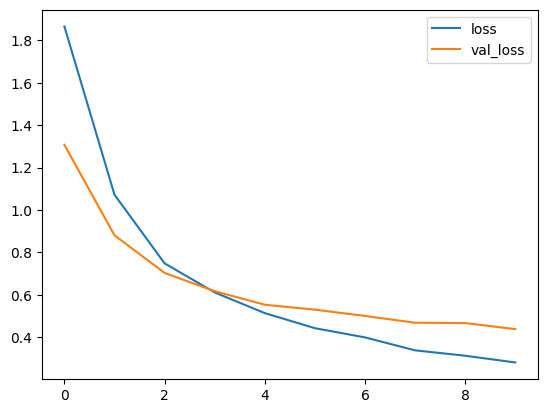

In [67]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [85]:
model.evaluate(test_data, steps=len(test_data))

79/79 [==============================] - 6s 71ms/step - loss: 0.4367 - accuracy: 0.8792


[0.4366636574268341, 0.8791999816894531]

In [77]:
model1 = tf_keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/feature-vector/1", trainable=False, input_shape=(224, 224, 3)),
    tf_keras.layers.Dense(10, activation="softmax")
])

In [78]:
model1.compile(loss="categorical_crossentropy", optimizer=tf_keras.optimizers.Adam(), metrics=["accuracy"])

In [79]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_10 (KerasLayer  (None, 2048)              23561152  
 )                                                               
                                                                 
 dense_8 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23581642 (89.96 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23561152 (89.88 MB)
_________________________________________________________________


In [80]:
tensorboard_callback = create_tensorboard_callback("tensorflow_hub", "ResNet50")

In [81]:
history = model1.fit(train_data, epochs=10, validation_data=test_data, callbacks=[tensorboard_callback], steps_per_epoch=len(train_data), validation_steps=len(test_data))

Epoch 1/10
24/24 [==============================] - 11s 265ms/step - loss: 1.8504 - accuracy: 0.4053 - val_loss: 1.0732 - val_accuracy: 0.6784
Epoch 2/10
24/24 [==============================] - 5s 236ms/step - loss: 0.8308 - accuracy: 0.7613 - val_loss: 0.7225 - val_accuracy: 0.7856
Epoch 3/10
24/24 [==============================] - 6s 266ms/step - loss: 0.5648 - accuracy: 0.8453 - val_loss: 0.6086 - val_accuracy: 0.8216
Epoch 4/10
24/24 [==============================] - 5s 228ms/step - loss: 0.4229 - accuracy: 0.8987 - val_loss: 0.6147 - val_accuracy: 0.8120
Epoch 5/10
24/24 [==============================] - 5s 228ms/step - loss: 0.3199 - accuracy: 0.9387 - val_loss: 0.5376 - val_accuracy: 0.8328
Epoch 6/10
24/24 [==============================] - 6s 238ms/step - loss: 0.2792 - accuracy: 0.9453 - val_loss: 0.5294 - val_accuracy: 0.8308
Epoch 7/10
24/24 [==============================] - 6s 238ms/step - loss: 0.2158 - accuracy: 0.9707 - val_loss: 0.5010 - val_accuracy: 0.8416
Epoch

<Axes: >

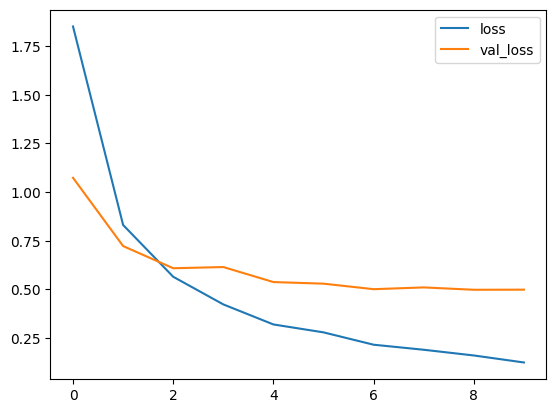

In [82]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [84]:
model1.evaluate(test_data, steps=len(test_data))

79/79 [==============================] - 6s 71ms/step - loss: 0.5023 - accuracy: 0.8336


[0.5023298859596252, 0.8335999846458435]

In [1]:
!tensorboard --logdir=./tensorflow_hub

E0000 00:00:1738691384.701441   93355 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738691384.705964   93355 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.18.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C
